Task 6: House Price Prediction

Objective

Build a machine learning model to predict house prices using features such as:          Property size (square feet)

Number of bedrooms

Number of bathrooms

Location (if available)

#
Dataset

House Price Prediction Dataset

1. Import Required Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


2. Load the Dataset

In [21]:
df = pd.read_csv("House Price Prediction Dataset.csv")


3. Basic Data Inspection

In [22]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())


   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
(2000, 10)
Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedroom

4. Handle Missing Values

In [23]:
df.isnull().sum()
# Fill missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop rows with missing categorical values (if any)
df.dropna(inplace=True)


5. Exploratory Data Analysis (EDA)

Price Distribution

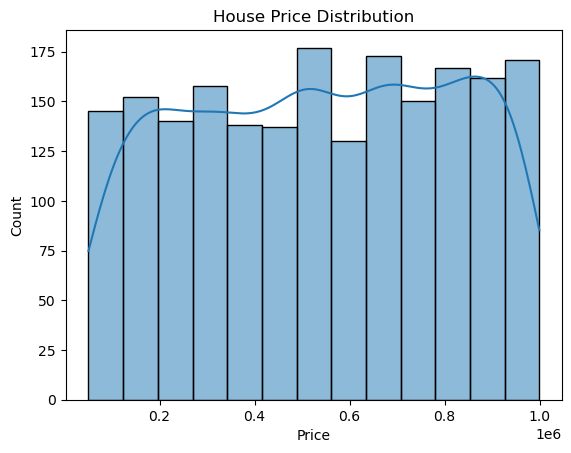

In [24]:
plt.figure()
sns.histplot(df['Price'], kde=True)
plt.title("House Price Distribution")
plt.show()


Price vs Area

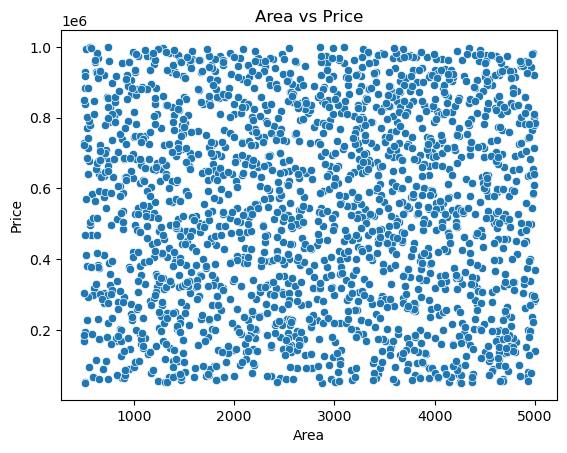

In [25]:
plt.figure()
sns.scatterplot(x=df['Area'], y=df['Price'])
plt.title("Area vs Price")
plt.show()


Correlation Heatmap

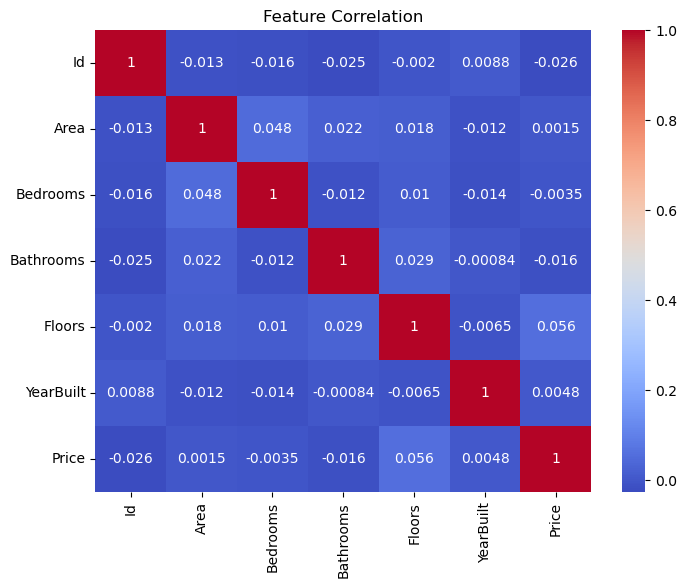

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


6. Encode Categorical Data (Location)

In [27]:
df = pd.get_dummies(df, drop_first=True)


#7. Split Features and Target

In [28]:
X = df.drop("Price", axis=1)
y = df["Price"]


#8. Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#9. Train the Model (Linear Regression)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#10. Make Predictions

In [31]:
y_pred = model.predict(X_test)


#11. Evaluate the Model

In [32]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 242867.44926338628
MSE: 78279764120.86241
RMSE: 279785.2106900263
R² Score: -0.006181784611834162
